# 1. Load Data for Clustering

In [172]:
import numpy as np
import pandas as pd
m2 = pd.read_csv('data_clustering.csv',dtype={'CLNT_ID':str})
m2=m2[['ACTIVE_DAYS', 'N_LOGIN', 'PURCHASE_CYCLE', 'SESS_SEQ',
       'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'TOTAL_BUY_AM_x', 'TOTAL_BUY_AM_y',
       'TOTAL_CT', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE']]
CUSM2=pd.read_csv('data_regression.csv',dtype={'CLNT_ID':str})
CUSM2=CUSM2.loc[:,'CLNT_ID']
m2.index=CUSM2.index
m2=pd.concat([CUSM2, m2], axis=1)
m2.head()

,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,118,2,59.0,4.5,46.500000,417.000000,38000.000000,76000,2,...,0,0,0,0,0,0,2,0,M,20
1,0000014,20,1,20.0,5.0,256.000000,7098.000000,34900.000000,69800,2,...,0,0,0,0,0,0,2,0,F,30
2,0000032,20,2,10.0,101.4,98.200000,2169.000000,15360.000000,76800,5,...,0,0,0,0,0,0,5,0,M,40
3,0000056,97,2,48.5,82.0,45.666667,1157.666667,7933.333333,23800,3,...,0,0,0,0,1,0,0,2,F,40
4,0000058,74,1,74.0,8.0,195.000000,3161.000000,21850.000000,131100,6,...,0,1,0,0,0,0,5,0,F,30


# 2. Clustering

In [122]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### - 60~80대 여성 Cluster

In [182]:
cluster = m2.loc[(m2['CLNT_GENDER']=='F')]
cluster = cluster.loc[(cluster['CLNT_AGE']==60) | (cluster['CLNT_AGE']==70) | (cluster['CLNT_AGE']==80)]  
cluster['CLNT_AGE'].value_counts()

60    3784
70     541
80      23
Name: CLNT_AGE, dtype: int64

In [183]:
CLNT_ID=cluster['CLNT_ID']
cluster = cluster.drop(['CLNT_ID','CLNT_GENDER','CLNT_AGE'], axis=1)
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
107,2,1,2.000000,8.0,94.000000,1507.000000,72000.000000,144000,2,0.0,...,0,0,0,2,0,0,0,0,0,0
221,28,2,14.000000,157.0,77.500000,911.500000,21250.000000,42500,2,0.0,...,0,0,0,0,0,0,0,0,2,0
307,97,1,97.000000,100.0,124.000000,1118.000000,37450.000000,74900,2,0.0,...,0,0,0,0,0,0,0,0,2,0
425,6,1,6.000000,3.0,49.000000,1169.000000,14400.000000,28800,2,0.0,...,0,0,0,0,0,0,0,0,0,2
555,97,3,32.333333,15.0,66.666667,1547.666667,123666.666667,371000,3,0.0,...,0,0,0,0,2,0,0,0,1,0


In [184]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
mms = MinMaxScaler()
mms.fit(cluster) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster)

### * Choose the number of clusters

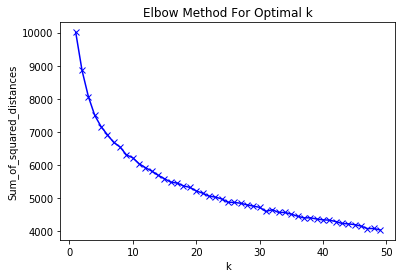

In [185]:
SSD = []

for k in range(1,50):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)
    
plt.plot(range(1,50), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### * 클러스터 특징 탐색

In [186]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster.columns
cluster_transformed.index = cluster.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,predict
107,0.005495,0.000000,0.005495,0.003094,0.180991,0.089326,0.025999,0.000307,0.000548,0.0,...,0.0,0.0,0.021505,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
221,0.148352,0.011111,0.071429,0.068949,0.147624,0.052817,0.007609,0.000090,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001124,0.000000,2
307,0.527473,0.000000,0.527473,0.043756,0.241658,0.065477,0.013479,0.000159,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001124,0.000000,2
425,0.027473,0.000000,0.027473,0.000884,0.089990,0.068604,0.005127,0.000061,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.030769,0
555,0.527473,0.022222,0.172161,0.006188,0.125716,0.091819,0.044720,0.000793,0.001095,0.0,...,0.0,0.0,0.000000,0.057143,0.0,0.0,0.0,0.000562,0.000000,1


In [187]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

# # predict clustering 4
# idx = np.where(cluster_transformed['predict'] == 3)
# cluster_3 = cluster.loc[cluster.index[idx]]

In [188]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2),"cluster2":round(cluster_2.mean(),2)})

,cluster0,cluster1,cluster2
ACTIVE_DAYS,93.44,115.53,115.45
N_LOGIN,2.24,3.95,4.06
PURCHASE_CYCLE,58.82,54.00,53.38
SESS_SEQ,64.61,111.63,114.01
TOT_PAG_VIEW_CT,94.71,87.67,90.99
TOT_SESS_HR_V,1695.13,1637.59,1646.42
TOTAL_BUY_AM_x,72161.35,68856.06,68572.83
TOTAL_BUY_AM_y,274131.85,404681.24,925734.88
TOTAL_CT,4.97,8.71,10.80
DVC_desktop,0.00,0.00,0.00


In [189]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [190]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     1264
CLAC0_1      684
CLAC0_2     1403
CLAC0_3     4690
CLAC0_4     2622
CLAC0_5      134
CLAC0_6     2264
CLAC0_7     2959
CLAC0_8    17515
CLAC0_9     4511
dtype: int64

<BarContainer object of 10 artists>

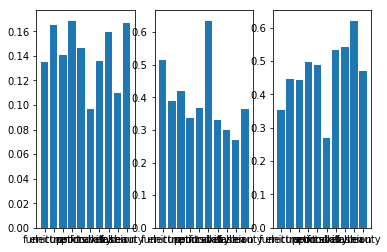

In [191]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 3)
plt.bar(labels, sum2/sum_of_sum)


In [193]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,171,648,445,furniture
CLAC0_1,113,265,306,electronic
CLAC0_2,197,586,620,pet
CLAC0_3,791,1573,2326,sports
CLAC0_4,383,960,1279,food
CLAC0_5,13,85,36,travel
CLAC0_6,308,749,1207,baby
CLAC0_7,472,884,1603,kitchen
CLAC0_8,1916,4720,10879,fashion
CLAC0_9,754,1642,2115,beauty


### - 60~80대 남성 Cluster

In [182]:
cluster = m2.loc[(m2['CLNT_GENDER']=='M')]
cluster = cluster.loc[(cluster['CLNT_AGE']==60) | (cluster['CLNT_AGE']==70) | (cluster['CLNT_AGE']==80)]  
cluster['CLNT_AGE'].value_counts()

60    3784
70     541
80      23
Name: CLNT_AGE, dtype: int64

In [183]:
CLNT_ID=cluster['CLNT_ID']
cluster = cluster.drop(['CLNT_ID','CLNT_GENDER','CLNT_AGE'], axis=1)
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
107,2,1,2.000000,8.0,94.000000,1507.000000,72000.000000,144000,2,0.0,...,0,0,0,2,0,0,0,0,0,0
221,28,2,14.000000,157.0,77.500000,911.500000,21250.000000,42500,2,0.0,...,0,0,0,0,0,0,0,0,2,0
307,97,1,97.000000,100.0,124.000000,1118.000000,37450.000000,74900,2,0.0,...,0,0,0,0,0,0,0,0,2,0
425,6,1,6.000000,3.0,49.000000,1169.000000,14400.000000,28800,2,0.0,...,0,0,0,0,0,0,0,0,0,2
555,97,3,32.333333,15.0,66.666667,1547.666667,123666.666667,371000,3,0.0,...,0,0,0,0,2,0,0,0,1,0


In [184]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
mms = MinMaxScaler()
mms.fit(cluster) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster)

### * Choose the number of clusters

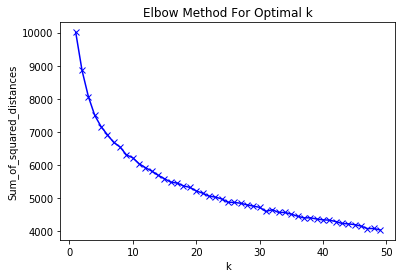

In [185]:
SSD = []

for k in range(1,50):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)
    
plt.plot(range(1,50), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### * 클러스터 특징 탐색

In [186]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출

cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster.columns
cluster_transformed.index = cluster.index
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,predict
107,0.005495,0.000000,0.005495,0.003094,0.180991,0.089326,0.025999,0.000307,0.000548,0.0,...,0.0,0.0,0.021505,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
221,0.148352,0.011111,0.071429,0.068949,0.147624,0.052817,0.007609,0.000090,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001124,0.000000,2
307,0.527473,0.000000,0.527473,0.043756,0.241658,0.065477,0.013479,0.000159,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001124,0.000000,2
425,0.027473,0.000000,0.027473,0.000884,0.089990,0.068604,0.005127,0.000061,0.000548,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.030769,0
555,0.527473,0.022222,0.172161,0.006188,0.125716,0.091819,0.044720,0.000793,0.001095,0.0,...,0.0,0.0,0.000000,0.057143,0.0,0.0,0.0,0.000562,0.000000,1


In [187]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

# # predict clustering 4
# idx = np.where(cluster_transformed['predict'] == 3)
# cluster_3 = cluster.loc[cluster.index[idx]]

In [188]:
pd.DataFrame({"cluster0":round(cluster_0.mean(),2),"cluster1":round(cluster_1.mean(),2),"cluster2":round(cluster_2.mean(),2)})

,cluster0,cluster1,cluster2
ACTIVE_DAYS,93.44,115.53,115.45
N_LOGIN,2.24,3.95,4.06
PURCHASE_CYCLE,58.82,54.00,53.38
SESS_SEQ,64.61,111.63,114.01
TOT_PAG_VIEW_CT,94.71,87.67,90.99
TOT_SESS_HR_V,1695.13,1637.59,1646.42
TOTAL_BUY_AM_x,72161.35,68856.06,68572.83
TOTAL_BUY_AM_y,274131.85,404681.24,925734.88
TOTAL_CT,4.97,8.71,10.80
DVC_desktop,0.00,0.00,0.00


In [189]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [190]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     1264
CLAC0_1      684
CLAC0_2     1403
CLAC0_3     4690
CLAC0_4     2622
CLAC0_5      134
CLAC0_6     2264
CLAC0_7     2959
CLAC0_8    17515
CLAC0_9     4511
dtype: int64

<BarContainer object of 10 artists>

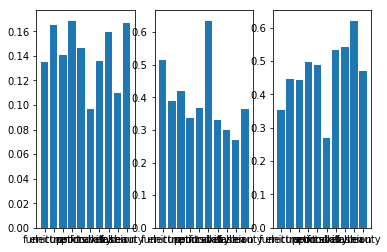

In [191]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(1, 3, 3)
plt.bar(labels, sum2/sum_of_sum)


In [193]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,171,648,445,furniture
CLAC0_1,113,265,306,electronic
CLAC0_2,197,586,620,pet
CLAC0_3,791,1573,2326,sports
CLAC0_4,383,960,1279,food
CLAC0_5,13,85,36,travel
CLAC0_6,308,749,1207,baby
CLAC0_7,472,884,1603,kitchen
CLAC0_8,1916,4720,10879,fashion
CLAC0_9,754,1642,2115,beauty


# 3. Scoring

In [200]:
def scorefun(k, x, data, transformed_data, category) :

    #k : clustering 개수
    #new_data : new data
    #data : F_20 처럼 m2에서 나이와 성별만 지정한 데이터. 대대분류 포함됨
    #transformed_data : F_20_transformed 처럼 성별과 나이대를 지정하고, predict column이 추가된 transforemd data
    #category : score를 원하는 원하는 대대분류
    
    category_rate = np.empty([k,10])
    for kk in range(k) :
       # sum_of_sum = data[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        idx=np.where(transformed_data['predict']==kk)

        clustering = data.loc[data.index[idx]] 
        sum_of_sum = log(clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()).sum()
        cate_sum=clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
        cate_sum[cate_sum== 0] = 1        
        category_rate[kk] = log(cate_sum)/sum_of_sum

    
    distance_from_centers = [0] * k
    xdata=transformed_data.loc[x, :"weekend_weekend"]
    for i in range(k) :
        distance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - xdata)**2))
        
    result = [0] * k
    for i in range(k) :
        result[i] = (category_rate[i][category]/distance_from_centers[i])
    
    return sum(result)*100

In [196]:
cluster_transformed['CLNT_ID']=CLNT_ID
cluster_transformed.index=cluster_transformed['CLNT_ID']

In [202]:
cluster.index = cluster_transformed.index

In [203]:
cluster['furniture_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,0))

In [205]:
cluster['furniture_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,0))
cluster['electronic_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,1))
cluster['pet_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,2))
cluster['sports_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,3))
cluster['food_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,4))
cluster['travel_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,5))
cluster['baby_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,6))
cluster['kitchen_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,7))
cluster['fashion_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,8))
cluster['beauty_SCORE'] = cluster_transformed['CLNT_ID'].apply(lambda x: scorefun(3, x, cluster, cluster_transformed,9))

In [206]:
cluster.head()

,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,DVC_desktop,...,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000886,2,1,2.000000,8.0,94.000000,1507.000000,72000.000000,144000,2,0.0,...,647.885142,586.750496,661.676533,798.971804,731.258864,384.188053,711.648577,744.789809,926.995566,795.207140
0001778,28,2,14.000000,157.0,77.500000,911.500000,21250.000000,42500,2,0.0,...,684.819639,620.213205,699.411239,844.531185,772.963624,406.094467,752.245375,787.271513,979.879398,840.547893
0002559,97,1,97.000000,100.0,124.000000,1118.000000,37450.000000,74900,2,0.0,...,622.664404,563.927900,635.935367,767.903198,702.819706,369.205970,683.979015,715.836217,890.961574,764.279799
0003373,6,1,6.000000,3.0,49.000000,1169.000000,14400.000000,28800,2,0.0,...,648.774078,587.553607,662.582566,800.064983,732.259412,384.717032,712.621340,745.807752,928.261947,796.295721
0004604,97,3,32.333333,15.0,66.666667,1547.666667,123666.666667,371000,3,0.0,...,719.156723,651.333850,734.503372,886.900370,811.750770,426.456904,790.009172,826.786677,1029.075914,882.710512


In [207]:
#Save
cluster[['furniture_SCORE', 'electronic_SCORE', 'pet_SCORE', 'sports_SCORE',
       'food_SCORE', 'travel_SCORE', 'baby_SCORE', 'kitchen_SCORE',
       'fashion_SCORE', 'beauty_SCORE']].to_csv('F_678.csv',index=True)

# 4. New Scoring

In [208]:
cluster_Score=pd.read_csv('F_678.csv',dtype={'CLNT_ID':str})
cluster_Score.head()

,CLNT_ID,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,0000886,647.885142,586.750496,661.676533,798.971804,731.258864,384.188053,711.648577,744.789809,926.995566,795.207140
1,0001778,684.819639,620.213205,699.411239,844.531185,772.963624,406.094467,752.245375,787.271513,979.879398,840.547893
2,0002559,622.664404,563.927900,635.935367,767.903198,702.819706,369.205970,683.979015,715.836217,890.961574,764.279799
3,0003373,648.774078,587.553607,662.582566,800.064983,732.259412,384.717032,712.621340,745.807752,928.261947,796.295721
4,0004604,719.156723,651.333850,734.503372,886.900370,811.750770,426.456904,790.009172,826.786677,1029.075914,882.710512


In [209]:
cluster_Score.index = cluster_Score['CLNT_ID']

In [210]:
#Ratio
m2['PD_BUY_CT2']=m2['CLAC0_0']+m2['CLAC0_1']+m2['CLAC0_2']+m2['CLAC0_3']+m2['CLAC0_4']+m2['CLAC0_4']+m2['CLAC0_5']+m2['CLAC0_6']+m2['CLAC0_7']+m2['CLAC0_8']+m2['CLAC0_9']
m2['C0_Ratio']=m2['CLAC0_0']/m2['PD_BUY_CT2']
m2['C1_Ratio']=m2['CLAC0_1']/m2['PD_BUY_CT2']
m2['C2_Ratio']=m2['CLAC0_2']/m2['PD_BUY_CT2']
m2['C3_Ratio']=m2['CLAC0_3']/m2['PD_BUY_CT2']
m2['C4_Ratio']=m2['CLAC0_4']/m2['PD_BUY_CT2']
m2['C5_Ratio']=m2['CLAC0_5']/m2['PD_BUY_CT2']
m2['C6_Ratio']=m2['CLAC0_6']/m2['PD_BUY_CT2']
m2['C7_Ratio']=m2['CLAC0_7']/m2['PD_BUY_CT2']
m2['C8_Ratio']=m2['CLAC0_8']/m2['PD_BUY_CT2']
m2['C9_Ratio']=m2['CLAC0_9']/m2['PD_BUY_CT2']

In [212]:
m3=pd.merge(m2,cluster_Score,on=['CLNT_ID'],how='inner')
m3.head()

C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'CLNT_ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,CLNT_ID,ACTIVE_DAYS,N_LOGIN,PURCHASE_CYCLE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,TOTAL_BUY_AM_x,TOTAL_BUY_AM_y,TOTAL_CT,...,furniture_SCORE,electronic_SCORE,pet_SCORE,sports_SCORE,food_SCORE,travel_SCORE,baby_SCORE,kitchen_SCORE,fashion_SCORE,beauty_SCORE
0,0000886,2,1,2.000000,8.0,94.000000,1507.000000,72000.000000,144000,2,...,647.885142,586.750496,661.676533,798.971804,731.258864,384.188053,711.648577,744.789809,926.995566,795.207140
1,0001778,28,2,14.000000,157.0,77.500000,911.500000,21250.000000,42500,2,...,684.819639,620.213205,699.411239,844.531185,772.963624,406.094467,752.245375,787.271513,979.879398,840.547893
2,0002559,97,1,97.000000,100.0,124.000000,1118.000000,37450.000000,74900,2,...,622.664404,563.927900,635.935367,767.903198,702.819706,369.205970,683.979015,715.836217,890.961574,764.279799
3,0003373,6,1,6.000000,3.0,49.000000,1169.000000,14400.000000,28800,2,...,648.774078,587.553607,662.582566,800.064983,732.259412,384.717032,712.621340,745.807752,928.261947,796.295721
4,0004604,97,3,32.333333,15.0,66.666667,1547.666667,123666.666667,371000,3,...,719.156723,651.333850,734.503372,886.900370,811.750770,426.456904,790.009172,826.786677,1029.075914,882.710512


In [213]:
m4=m3[[
 'CLNT_ID',
 'PD_BUY_CT2',
 'CLAC0_0',
 'CLAC0_1',
 'CLAC0_2',
 'CLAC0_3',
 'CLAC0_4',
 'CLAC0_5',
 'CLAC0_6',
 'CLAC0_7',
 'CLAC0_8',
 'CLAC0_9',
 'C0_Ratio',
 'C1_Ratio',
 'C2_Ratio',
 'C3_Ratio',
 'C4_Ratio',
 'C5_Ratio',
 'C6_Ratio',
 'C7_Ratio',
 'C8_Ratio',
 'C9_Ratio',
 'furniture_SCORE',
 'travel_SCORE',
 'electronic_SCORE',
 'pet_SCORE',
 'sports_SCORE',
 'food_SCORE',
 'baby_SCORE',
 'kitchen_SCORE',
 'fashion_SCORE',
 'beauty_SCORE']]

### * 가구

In [ ]:
import tqdm
m4['furniture_new']=arange(0,len(m4))
for i in tqdm.tqdm(arange(len(m4))) :
    if m4['C0_Ratio'][i] == 0 :
        m4['furniture_new'][i]=m4['furniture_SCORE'][i]
    else : m4['furniture_new'][i]=m4['furniture_SCORE'][i]*(1+m4['C0_Ratio'][i])

C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
  0%|                                                                                         | 0/4348 [00:00<?, ?it/s]C:\Users\pj903\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pj903\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [ ]:
m4[['furniture_new','CLAC0_0']].sort_values(['furniture_new'],ascending=False)

### * 여행

In [ ]:
m4['travel_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C1_Ratio'][i] == 0 :
        m4['travel_new'][i]=m4['travel_SCORE'][i]
    else : m4['travel_new'][i]=m4['travel_SCORE'][i]*(1+m4['C1_Ratio'][i])

In [ ]:
m4[['travel_new','CLAC0_1']].sort_values(['travel_new'],ascending=False)

### * 전자제품

In [ ]:
m4['electronic_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C2_Ratio'][i] == 0 :
        m4['electronic_new'][i]=m4['electronic_SCORE'][i]
    else : m4['electronic_new'][i]=m4['electronic_SCORE'][i]*(1+m4['C2_Ratio'][i])

In [ ]:
m4[['electronic_new','CLAC0_2']].sort_values(['electronic_new'],ascending=False)

### * 반려동물

In [ ]:
m4['pet_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C3_Ratio'][i] == 0 :
        m4['pet_new'][i]=m4['pet_SCORE'][i]
    else : m4['pet_new'][i]=m4['pet_SCORE'][i]*(1+m4['C3_Ratio'][i])

In [ ]:
m4[['pet_new','CLAC0_3']].sort_values(['pet_new'],ascending=False)

### * 스포츠

In [ ]:
m4['sports_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C4_Ratio'][i] == 0 :
        m4['sports_new'][i]=m4['sports_SCORE'][i]
    else : m4['sports_new'][i]=m4['sports_SCORE'][i]*(1+m4['C4_Ratio'][i])

In [ ]:
m4[['sports_new','CLAC0_4']].sort_values(['sports_new'],ascending=False)

### * 음식

In [ ]:
m4['food_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C5_Ratio'][i] == 0 :
        m4['food_new'][i]=m4['food_SCORE'][i]
    else : m4['food_new'][i]=m4['food_SCORE'][i]*(1+m4['C5_Ratio'][i])

In [ ]:
m4[['food_new','CLAC0_5']].sort_values(['food_new'],ascending=False)

### * 아동

In [ ]:
m4['baby_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C6_Ratio'][i] == 0 :
        m4['baby_new'][i]=m4['baby_SCORE'][i]
    else : m4['baby_new'][i]=m4['baby_SCORE'][i]*(1+m4['C6_Ratio'][i])

In [ ]:
m4[['baby_new','CLAC0_6']].sort_values(['baby_new'],ascending=False)

### * 주방

In [ ]:
m4['kitchen_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C7_Ratio'][i] == 0 :
        m4['kitchen_new'][i]=m4['kitchen_SCORE'][i]
    else : m4['kitchen_new'][i]=m4['kitchen_SCORE'][i]*(1+m4['C7_Ratio'][i])

In [ ]:
m4[['kitchen_new','CLAC0_7']].sort_values(['kitchen_new'],ascending=False)

### * 패션

In [ ]:
m4['fashion_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C8_Ratio'][i] == 0 :
        m4['fashion_new'][i]=m4['fashion_SCORE'][i]
    else : m4['fashion_new'][i]=m4['fashion_SCORE'][i]*(1+m4['C8_Ratio'][i])

In [ ]:
m4[['fashion_new','CLAC0_8']].sort_values(['fashion_new'],ascending=False)

### * 뷰티

In [ ]:
m4['beauty_new']=arange(0,len(m4))
for i in arange(len(m4)) :
    if m4['C9_Ratio'][i] == 0 :
        m4['beauty_new'][i]=m4['beauty_SCORE'][i]
    else : m4['beauty_new'][i]=m4['beauty_SCORE'][i]*(1+m4['C9_Ratio'][i])

In [ ]:
m4[['beauty_new','CLAC0_9']].sort_values(['beauty_new'],ascending=False)

# 5. 시각화

In [97]:
F_678_Score=m4[['furniture_new','travel_new','electronic_new','pet_new','sports_new','food_new','baby_new','kitchen_new','fashion_new','beauty_new']]
F_678_Score.mean().values

array([ 153.92657384,   77.81704939,  145.4027811 ,  174.30600798,
        206.1835385 , 2159.69963201,  184.5914611 ,  182.29767505,
        310.93725191,  218.36399659])

In [104]:
labels=['furniture_new','travel_new','electronic_new','pet_new','sports_new','food_new','baby_new','kitchen_new','fashion_new','beauty_new']
stats=F_678_Score.loc[10,labels].values

In [105]:
mean_stats=F_678_Score.mean()[0:].values
mean_stats=np.concatenate((mean_stats,[mean_stats[0]]))

In [106]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

In [107]:
stats2=F_678_Score.loc[20,labels].values

stats2=np.concatenate((stats2,[stats2[0]]))

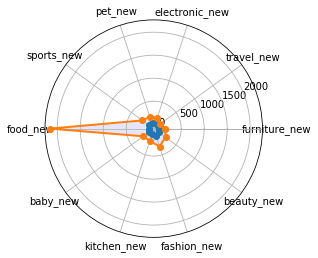

In [108]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([F_678_Score.loc[2,"Name"]])
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)
#ax.plot(angles, median_stats, 'o-', linewidth=2)
#ax.fill(angles, median_stats,alpha=0.1)

ax.grid(True)

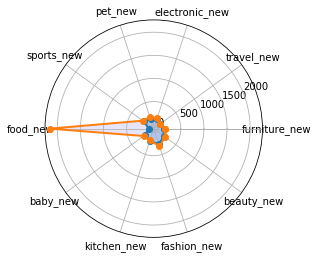

In [109]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats2, 'o-', linewidth=2)
ax.fill(angles, stats2, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([F_678_Score.loc[2,"Name"]])
ax.plot(angles, mean_stats, 'o-', linewidth=2)
ax.fill(angles, mean_stats,"b",alpha=0.1)
#ax.plot(angles, median_stats, 'o-', linewidth=2)
#ax.fill(angles, median_stats,alpha=0.1)

ax.grid(True)

In [110]:
z

NameError: name 'z' is not defined